In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Praktikum 1 Klasifikasi 🐱 dan 🐶

## **Deskripsi**
Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

## **Dataset**
Dataset merupakan data citra anjing dan kucing yang telah dibagi menjadi data training dan data testing. Dikarenakan data cukup besar, pastikan koneksi Anda sebelum mengunduh dataset.

Langkah 1 - Import Library

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Langkah 2 - Pra Pengolahan Data

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

- Langkah 2.1. Pra Pengolahan Data Training

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Pertemuan 11/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


- Langkah 2.2. Pra Pengolahan Data Testing

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Pertemuan 11/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


Langkah 3 - Pembuatan Model CNN

- Langkah 3.1.  - Inisiasi Model CNN

In [ ]:
cnn = tf.keras.models.Sequential()

- Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

- Langkah 3.3 - Pembuatan Layer Pooling 1

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

- Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

- Langkah 3.5 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

- Langkah 3.6 - Fully Connected Layer 1 (Input)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

- Langkah 3.7 - Fully Connected Layer 2 (Output)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

- Langkah 3.8 - Compile Model CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan loss function binary crossentropy dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 1390s 6s/step - loss: 0.6707 - accuracy: 0.5860 - val_loss: 0.6678 - val_accuracy: 0.6180
Epoch 2/25
250/250 [==============================] - 85s 341ms/step - loss: 0.6066 - accuracy: 0.6719 - val_loss: 0.5760 - val_accuracy: 0.6985
Epoch 3/25
250/250 [==============================] - 81s 324ms/step - loss: 0.5700 - accuracy: 0.7091 - val_loss: 0.5307 - val_accuracy: 0.7435
Epoch 4/25
250/250 [==============================] - 86s 342ms/step - loss: 0.5358 - accuracy: 0.7265 - val_loss: 0.5909 - val_accuracy: 0.6730
Epoch 5/25
250/250 [==============================] - 82s 329ms/step - loss: 0.5128 - accuracy: 0.7439 - val_loss: 0.4967 - val_accuracy: 0.7705
Epoch 6/25
250/250 [==============================] - 87s 349ms/step - loss: 0.4893 - accuracy: 0.7584 - val_loss: 0.4971 - val_accuracy: 0.7645
Epoch 7/25
250/250 [==============================] - 80s 318ms/step - loss: 0.4770 - accuracy: 0.7666 - val_loss: 0.4991 - val_acc

Langkah 5 - Prediksi dengan 1 Citra

Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Pertemuan 11/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 109ms/step


# Praktikum 2 Klasifikasi Multi-label dengan Data CIFAR

Desclaimer: Praktikum ini merupakan tutorial CNN dari Tensorflow yang dapat diakses pada laman https://www.tensorflow.org/tutorials/images/cnn

## **Deskripsi**
Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.

Langkah 1 - Load Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, utils, callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

Langkah 2 - Unduh Dataset CIFAR

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


Langkah 3 - Verifikasi Data

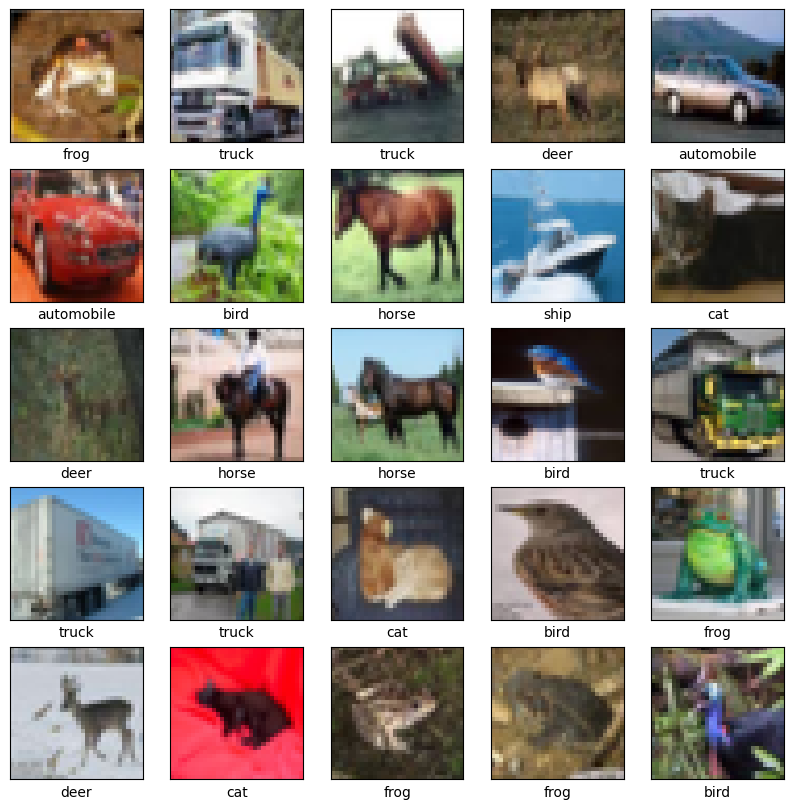

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
# The CIFAR labels happen to be arrays,
# which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Langkah 4 - Buat Model CNN

- Langkah 4.1. - Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

- Langkah 4.2. - Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

Langkah 4.3. - Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Langkah 4.4. - Cek Arsitektur Model CNN

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

- Langkah 4.5. - Compile Model CNN

In [ ]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

Langkah 5 - Fit Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 88s 55ms/step - loss: 1.5414 - accuracy: 0.4356 - val_loss: 1.2427 - val_accuracy: 0.5532
Epoch 2/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.1695 - accuracy: 0.5854 - val_loss: 1.0551 - val_accuracy: 0.6283
Epoch 3/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.0076 - accuracy: 0.6475 - val_loss: 0.9525 - val_accuracy: 0.6595
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9071 - accuracy: 0.6796 - val_loss: 0.9208 - val_accuracy: 0.6780
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8363 - accuracy: 0.7082 - val_loss: 0.8903 - val_accuracy: 0.6906
Epoch 6/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7743 - accuracy: 0.7292 - val_loss: 0.8515 - val_accuracy: 0.7061
Epoch 7/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.7259 - accuracy: 0.7449 - val_loss: 0.8886 -

Langkah 6 - Evaluasi Model

313/313 - 6s - loss: 0.8695 - accuracy: 0.7121 - 6s/epoch - 20ms/step


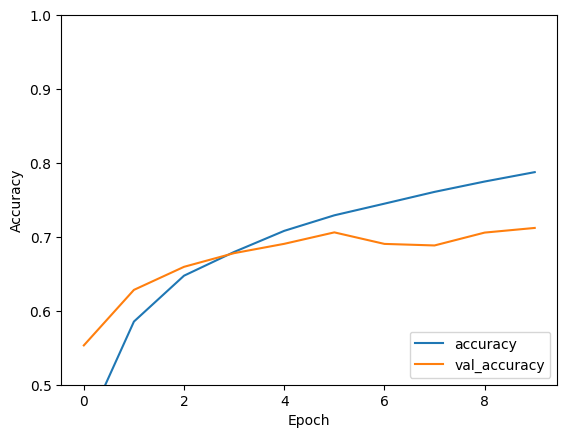

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Langkah 7 - Cetak Hasil Akurasi

In [ ]:
print(test_acc)

0.7121000289916992


# Tugas



- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = utils.to_categorical(y_train, 10)
y_cat_test = utils.to_categorical(y_test, 10)

INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = models.Sequential()

# Convolutional Layer
model.add(layers.Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
# Pooling layer
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2)

batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/50
1562/1562 [==============================] - 60s 27ms/step - loss: 1.6358 - accuracy: 0.4093 - precision: 0.6117 - recall: 0.1947 - val_loss: 1.6804 - val_accuracy: 0.3924 - val_precision: 0.5897 - val_recall: 0.2285
Epoch 2/50
1562/1562 [==============================] - 46s 29ms/step - loss: 1.2420 - accuracy: 0.5604 - precision: 0.7225 - recall: 0.3938 - val_loss: 1.1940 - val_accuracy: 0.5905 - val_precision: 0.6909 - val_recall: 0.4939
Epoch 3/50
1562/1562 [==============================] - 41s 26ms/step - loss: 1.0511 - accuracy: 0.6337 - precision: 0.7643 - recall: 0.5007 - val_loss: 0.9157 - val_accuracy: 0.6851 - val_precision: 0.7909 - val_recall: 0.5846
Epoch 4/50
1562/1562 [==============================] - 42s 27ms/step - loss: 0.9353 - accuracy: 0.6760 - precision: 0.7940 - recall: 0.5607 - val_loss: 0.8351 - val_accuracy: 0.7177 - val_precision: 0.7998 - val_recall: 0.6432
Epoch 5/50
1562/1562 

313/313 [==============================] - 1s 4ms/step - loss: 0.3845 - accuracy: 0.8774 - precision: 0.9029 - recall: 0.8563
Test Accuracy : 87.74%


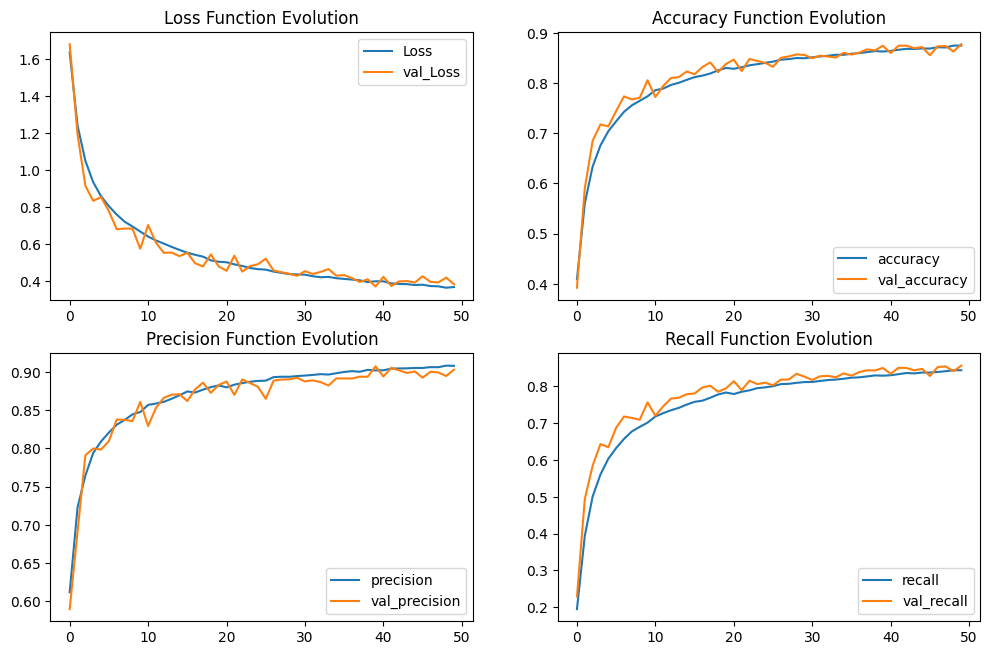

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

- Buatlah model CNN untuk klasifikasi dataset MNIST.

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1444 - accuracy: 0.9556 - val_loss: 0.0503 - val_accuracy: 0.9838
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.0448 - val_accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0280 - val_accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0271 - val_accuracy: 0.9906
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0244 - val_accuracy: 0.9922
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0280 - val_accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step 

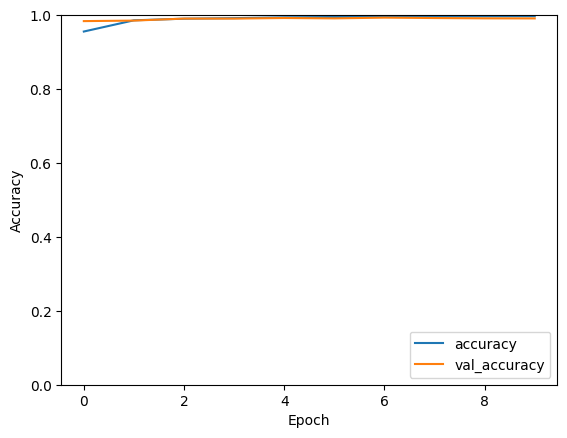

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data to fit the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Define the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

# Plot training accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()